In [2]:
# importing the packages that will be needed
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from random import sample

In [3]:
from sklearn.datasets import load_iris
sk_iris = load_iris() #load the dataset

#check if it's correctly imported
print(sk_iris.keys()) #it is supposed to be a dictionary, let's see the keys
print('\n')
print(sk_iris.data.shape) #1 column is missing... becuase it's the target!
print('\n')
print(sk_iris.feature_names) #name of the features
print('\n')
print(sk_iris.DESCR) #description of the dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(150, 4)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4

In [4]:
#read into panda and explore the dataset

#np.c_ -> concatenate function used to concat sk_iris['data'] and sk_iris['target'] arrays 
#pandas column argument -> concat sk_iris['feature_names'] list and the target.  
iris = pd.DataFrame(data= np.c_[sk_iris['data'], sk_iris['target']],
                    columns= sk_iris['feature_names'] + ['target'])
iris['target'] = iris['target'].astype('category') #make the �iris species� feature a categorical column
iris.rename(columns={"target": "species"}, inplace=True)

print('HEAD:')
print(iris.head()) #print the head
print('\n')
print('TAIL:')
print(iris.tail()) #to check out last 10 row of the data set
print('\n')
print('DESCRIPTION:')
print(iris.describe()) #to give a statistical summary about the dataset
print('\n')
print('RANDOM:')
print(iris.sample(5))
print('\n')
print('IS NULL:')
print(iris.isnull().sum()) #checks out how many null info are on the dataset
print('\n')
print('DATATYPES:')
print(iris.dtypes)

HEAD:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


TAIL:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9            

In [10]:
#print the whole dataset

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

In [80]:
#let's do the tasks about the exercise!

print('1) ROWS AND COLUMNS:')
print(iris.shape)
print('\n')
print('2) MEAN OF \'petal length (cm)\':')
pl_mean = iris["petal length (cm)"].mean()
print(pl_mean)
print('\n')
print('3) MEAN OF EVERY NUMERIC COLUMN:')
print(iris._get_numeric_data().mean()) #we can notice that the data are of the type "float64"

1) ROWS AND COLUMNS:
(150, 5)


2) MEAN OF 'petal length (cm)':
3.7580000000000027


3) MEAN OF EVERY NUMERIC COLUMN:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [81]:
#compute the standard deviation of each numerical feature, for each iris species
print('5) SD FOR EACH IRIS SPECIES:')
print(iris.groupby("species").std())

5) SD FOR EACH IRIS SPECIES:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                           
0.0               0.352490          0.379064           0.173664   
1.0               0.516171          0.313798           0.469911   
2.0               0.635880          0.322497           0.551895   

         petal width (cm)  
species                    
0.0              0.105386  
1.0              0.197753  
2.0              0.274650  


4) OUTLIERS OF 'PETAL LENGTH':
19
4.1) 3 RANDOM OUTLIERS (id):
[109, 107, 118]



7.1) OUTLIERS OF 'PETAL LENGTH' (SPECIES 0):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


7.2) OUTLIERS OF 'PETAL LENGTH' (SPECIES 1):
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []


7.3) OUTLIERS OF 'PETAL LENGTH' (SPECIES 2):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.3               3.3                6.0               2.5   
1                 7.1               3.0                5.9               2.1   
2                 6.5               3.0                5.8               2.2   
3                 7.6               3.0                6.6               2.1   
4                 7.3               2.9                6.3               1.8   
5                 6.7               2.5                5.8   

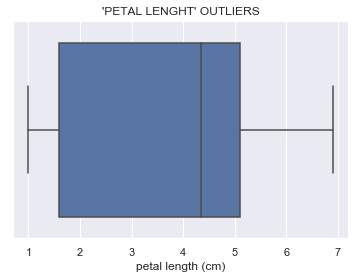

In [88]:
#working with outliers...

#searhing outliers
#(ouliers = An outlier is defined as being any point of data that lies
#     over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3) in a data set.)
sns.boxplot(x=iris["petal length (cm)"]).set_title('\'PETAL LENGHT\' OUTLIERS') #no outliers...

#let's search the vaues where petal length is 50% greater than the average petal length
pl_outliers = list()
for i,val in enumerate(iris["petal length (cm)"]):
    if val >= pl_mean*3/2:
        pl_outliers.append(i)

print('4) OUTLIERS OF \'PETAL LENGTH\':')
print(len(pl_outliers))
print('4.1) 3 RANDOM OUTLIERS (id):')
print(sample(pl_outliers, 3))
print('\n\n')

out_species0 = pd.DataFrame(columns=iris.columns)
out_species1 = pd.DataFrame(columns=iris.columns)
out_species2 = pd.DataFrame(columns=iris.columns)
for index, row in iris.iterrows():
    if row["petal length (cm)"] >= pl_mean*3/2: #if it's an outlier add to his proper dataframe
        if row["species"] == 0.0:            
            out_species0.loc[len(out_species0)] = row
        elif row["species"] == 1.0:
            out_species1.loc[len(out_species1)] = row
        elif row["species"] == 2.0:
            out_species2.loc[len(out_species2)] = row

print('7.1) OUTLIERS OF \'PETAL LENGTH\' (SPECIES 0):')
print(out_species0) #empty

print('\n')
print('7.2) OUTLIERS OF \'PETAL LENGTH\' (SPECIES 1):')
print(out_species1) #empty
print('\n')
print('7.3) OUTLIERS OF \'PETAL LENGTH\' (SPECIES 2):')
print(out_species2) #all 19 are here
print('\n')